# Bagging 기법
####    RandomForest는 Bagging 방식을 적용한 알고리즘
####    Bagging 방식으로 각자의 데이터를 샘플링해서 개별적으로 학습한 후
####    최종적으로 투표를 통해서 가장 보편적인 예측결정을 함 (Classification의 경우)
    
####    Bagging = Bootstrap Aggregation

####    사이킷런은 RandomForestClassifier 클래스를 통해서 RandomForest 기반의 분류를 지원함

## 1. Iris Data Load

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [5]:
iris = datasets.load_iris()

## 2. Data Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target, random_state = 42)

## 3. RF Model Generating

In [23]:
from sklearn.ensemble import RandomForestClassifier
'''
n_estimator : 만들 결정트리 수, estimator의 수

max_feature : 뽑을 Feature의 종류 수
'''
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 4. Modael Accuracy Measurement
####    1. 직접 측정
####    2. 사용자 함수 정의해서 측정
####    3. 라이브러리 이용해서 측정... score(), accuracy_score
####    4. Confusion Matrix

In [24]:
# 1. 
pred = rf.predict(X_test)
print(pred)
print(y_test)
# 100%

[0 1 1 1 0 1 1 2 2 2 1 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 2 2 2 0 0 0 0 2
 1]
[0 1 1 1 0 1 2 2 2 2 2 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]


In [25]:
# zip() 으로 병행해서 보기
y_tuple = list(zip(y_test,pred))
# y_tuple

In [36]:
# 2. 사용자 함수 정의
count = 0
for a, b in y_tuple:
    if not a==b:
        print('unmatched : (y_test,pred) = ({},{})'.format(a,b))
        count = count +1
print('Total Unmatched : {}' .format(count))
print('Accuracy : {:3f}' .format(1-(count/len(y_test))))

unmatched : (y_test,pred) = (2,1)
unmatched : (y_test,pred) = (2,1)
unmatched : (y_test,pred) = (1,2)
Total Unmatched : 3
Accuracy : 0.921053


In [40]:
# 3. accuracy_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(round(accuracy,6)*100)

92.1053


## Confusion Matrix

In [47]:
# 일단 샘플데이터로 해보기
from sklearn.metrics import confusion_matrix
y_true= [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]


cm = confusion_matrix(y_true, y_pred)

In [52]:
a = ['cherry','apple','apple','banana','cherry']
b = ['banana','apple','apple','banana','apple']
confusion_matrix(a,b) # 기본 정렬

array([[2, 0, 0],
       [0, 1, 0],
       [1, 1, 0]], dtype=int64)

In [53]:
a = ['cherry','apple','apple','banana','cherry']
b = ['banana','apple','apple','banana','apple']
confusion_matrix(a,b,labels=['cherry','banana','apple'])

array([[0, 1, 1],
       [0, 1, 0],
       [0, 0, 2]], dtype=int64)

In [59]:
cm= confusion_matrix(y_test,pred)

## DataFrame Visualization

In [58]:
df = pd.DataFrame(confusion_matrix(y_test,pred),columns=iris.target_names,index=iris.target_names)
df

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,12,1
virginica,0,2,11



## HeatMap Visualization

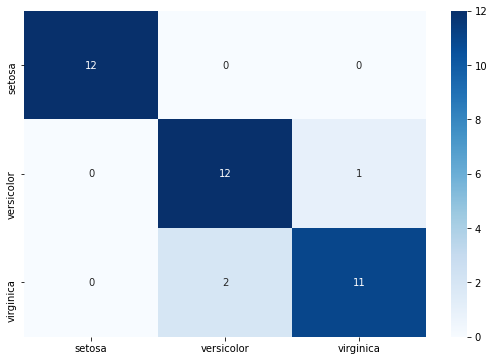

In [65]:
plt.figure(figsize=(9,6))
sns.heatmap(df, annot= True, cmap=plt.cm.Blues)
plt.show()